# Clustering Yelp Restaurants

**Part 2: To be completed INDIVIDUALLY and due on October 21 at 7pm.**

In this assignment, we will continue to work with the [Yelp dataset](https://drive.google.com/open?id=0B4bdB5WPHGsqcmJMNmxzQmQ3aTQ) that we used in Homework 2-1.

We will continue to try to find culinary districts in Las Vegas. 

(As a reminder from last time, these are characterized by closeness and similarity of restaurants. Use the "longitude" and "latitude" to cluster closeness.)

However, in this analysis we will not use the Yelp-supplied "categories" to cluster for similarity as we did in Part 1.

Instead we will cluster the reviews themselves, extracting categories in an unsupervised fashion.  

Specifically, you are to use Latent Semantic Analysis (LSA) on the Yelp reviews to cluster restaurants based off on their reviews.  As a reminder, LSA consists of using PCA applied to the document-term matrix.

LSA was covered in lecture, and there is another tutorial [here.](http://www.datascienceassn.org/sites/default/files/users/user1/lsa_presentation_final.pdf
)

**(20 pts)**

In [1]:
# Step 1: Get review categories with business_id => reviews and location
# Import business json data
import json

data = []
for line in open('yelp_academic_dataset_business.json', 'r'):
    data.append(json.loads(line))

In [2]:
parsed_data = []
for x in data:
    if x['city'] == 'Las Vegas' and 'Restaurants' in x['categories']:
        parsed_data.append(x)

In [3]:
# Get the mean value of longitude and latitude
# Since the file size of review is far larger than business object, we assume every shop has at least one review
# Therefore we first calculate the center from business object
import math
longitude_sum = 0
latitude_sum = 0
for x in parsed_data:
    longitude_sum = longitude_sum + math.fabs(x['longitude'])
    latitude_sum = latitude_sum + x['latitude']

longitude_ave = longitude_sum / len(parsed_data)
latitude_ave = latitude_sum / len(parsed_data)

In [4]:
# Adjust the scale of longitude and latitude to string information
def getLocationInfo(x, longitude_ave, latitude_ave):
    if (math.fabs(x['longitude']) >= longitude_ave and x['latitude'] >= latitude_ave):
        return 'NorthWest.' 
    elif (math.fabs(x['longitude']) < longitude_ave and x['latitude'] > latitude_ave):
        return 'NorthEast.'
    elif (math.fabs(x['longitude']) > longitude_ave and x['latitude'] < latitude_ave):
        return 'SouthWest.' 
    elif (math.fabs(x['longitude']) < longitude_ave and x['latitude'] < latitude_ave):
        return 'SouthEast.' 

In [5]:
# Get relationship between business id and location
loc_parsed_data = {}
for x in parsed_data:
    location = getLocationInfo(x, longitude_ave, latitude_ave)
    loc_parsed_data[x['business_id']] = location

In [6]:
# Read reviews
merged_review_data = {}
for line in open('yelp_academic_dataset_review.json', 'r'):
    json_line = json.loads(line)
    bid = json_line['business_id']
    if (bid in merged_review_data):
        merged_review_data[bid] = merged_review_data[bid] + ' ' + json_line['text']
    else:
        merged_review_data[bid] = json_line['text']

In [7]:
# merged_review_data = {}
# for x in review_data:
#     bid = x['business_id']
#     if (bid in merged_review_data):
#         merged_review_data[bid] = merged_review_data[bid] + ' ' + x['text']
#     else:
#         merged_review_data[bid] = x['text']

Now for Dict parsed_data, its format is business_id: location. review1. review2. review3. ...

In [8]:
# Conjunt reviews dataset with business dataset
combined_set = {}
for key,value in merged_review_data.items():
    if (key in loc_parsed_data):
        combined_set[key] = ''
        combined_set[key] = loc_parsed_data[key] + ' ' + value

In [9]:
# Extract the value in parsed_data and construct a string list
str_list = []
for value in combined_set.values():
    str_list.append(value)

In [10]:
# Step 2: Use LSA on clustering data
# Vectorize
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', min_df = 5)
dtm = vectorizer.fit_transform(str_list)

In [11]:
# Apply PCA
import numpy as np
dtm_dense = dtm.todense()
centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
# np.sum(centered_dtm,axis=0)[:,:10]
u, s, vt = np.linalg.svd(centered_dtm, full_matrices=False)

In [12]:
import pandas as pd
pd.DataFrame(vt,columns=vectorizer.get_feature_names())

,00,000,007,00a,00am,00ish,00p,00pm,01,01pm,...,éclairs,énormes,étaient,était,étouffée,été,êtes,être,über,œuvre
0,-0.000271,-0.000431,-0.000347,-0.000124,-0.000337,-3.354423e-05,-0.000040,-0.001009,0.000167,0.000464,...,0.000058,0.000113,-0.000020,8.713729e-05,-0.000108,-0.000016,0.000003,1.731433e-06,-0.000141,-1.019660e-05
1,-0.009871,-0.000727,-0.000792,-0.000205,0.000118,-2.817251e-05,-0.000116,-0.001018,0.000020,-0.000139,...,-0.000102,-0.000035,-0.000037,-2.175982e-04,0.000267,-0.000005,0.000040,-1.560296e-04,0.000110,-2.435649e-05
2,0.007649,0.000727,-0.002164,0.000195,0.000387,5.085094e-05,0.000097,-0.000382,-0.000373,-0.000025,...,0.000049,0.000067,-0.000005,5.280309e-05,-0.000308,0.000064,0.000010,7.646372e-05,0.000244,-1.260104e-05
3,0.002287,-0.000570,0.000600,-0.000278,-0.000966,1.076942e-05,-0.000177,-0.000451,-0.000211,0.000100,...,-0.000066,-0.000104,-0.000008,-3.431726e-05,-0.000271,-0.000149,-0.000053,-3.379039e-05,0.000072,-9.425538e-06
4,0.005065,0.000547,0.001551,0.000112,0.000537,5.174297e-05,0.000012,0.000770,0.000219,0.000019,...,0.000020,0.000056,-0.000056,5.394424e-05,-0.000090,0.000064,-0.000019,3.727814e-05,0.000246,2.414747e-05
5,0.001807,0.000662,-0.000588,0.000368,0.000768,7.813974e-05,-0.000076,0.000905,-0.000005,0.000103,...,0.000163,-0.000325,-0.000025,1.398966e-04,0.000901,-0.000265,-0.000028,5.650915e-05,0.000317,3.421722e-05
6,0.000348,-0.000698,0.000207,0.000588,0.001682,9.858093e-05,0.000115,0.000080,0.000244,-0.000098,...,0.000282,-0.000022,-0.000064,-1.250681e-04,-0.000955,-0.000090,0.000127,-7.789684e-05,-0.000379,-4.707454e-05
7,0.001165,0.000589,-0.000566,0.000245,0.000566,6.274731e-05,-0.000152,0.000871,0.000302,0.000122,...,0.000044,0.000059,-0.000054,9.792800e-05,0.000794,0.000087,0.000055,1.603280e-05,0.000213,1.158335e-05
8,-0.002250,-0.000479,0.000079,-0.000977,-0.002778,-1.679024e-04,0.000241,-0.002080,-0.000243,-0.000045,...,-0.000291,-0.000039,-0.000063,1.330004e-05,0.000084,-0.000008,-0.000067,5.117930e-05,-0.000156,4.605111e-06
9,-0.000599,0.000026,-0.000223,-0.000612,-0.001941,-1.472327e-04,-0.000017,0.000482,-0.000064,0.000024,...,-0.000147,-0.000082,-0.000008,4.203456e-05,0.000914,-0.000013,0.000030,5.522889e-05,0.000087,1.995072e-05


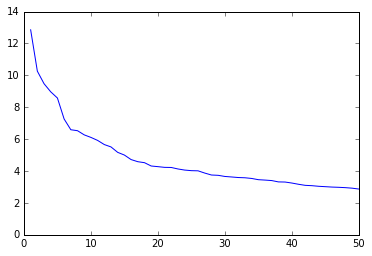

In [13]:
# Decide number of components
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlim([0,50])
plt.plot(range(1,len(s)+1),s)

In [19]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
ri = []
ss = []
max = len(u)
for k in range(1,50):
    vectorsk = u[:,:k] @ np.diag(s[:k])
    kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10, random_state=0)
    kmeans.fit_predict(vectorsk)
    labelsk = kmeans.labels_
    # ri.append(metrics.adjusted_rand_score(labelsk,str_list))
    ss.append(metrics.silhouette_score(vectorsk,kmeans.labels_,metric='euclidean'))

Here we can see the score reaches to peek with two components, so we choose component number as 2

In [66]:
# SVD and LSA
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
lsa = TruncatedSVD(12, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [69]:
pd.DataFrame(lsa.components_,index = ["component_1","component_2", "component_3", "component_4", "component_5", "component_6", "component_7","component_8", "component_9", "component_10", "component_11", "component_12"],columns = vectorizer.get_feature_names())

,00,000,007,00a,00am,00ish,00p,00pm,01,01pm,...,éclairs,énormes,étaient,était,étouffée,été,êtes,être,über,œuvre
component_1,0.013244,0.001009,0.000243,0.000125,0.000885,0.000035,0.000159,0.001726,0.000456,6.942080e-05,...,0.000054,0.000047,0.000023,0.000083,0.000207,0.000035,0.000034,0.000056,0.000206,0.000010
component_2,0.001718,-0.000295,-0.000303,-0.000098,-0.000279,-0.000027,-0.000015,-0.000821,0.000188,4.786725e-04,...,0.000072,0.000121,-0.000016,0.000110,-0.000141,-0.000012,0.000003,0.000019,-0.000134,-0.000008
component_3,-0.002521,-0.000215,0.002120,-0.000029,-0.000390,-0.000031,-0.000028,0.000800,0.000268,7.408010e-05,...,0.000011,-0.000042,0.000025,0.000072,0.000178,-0.000045,-0.000031,0.000021,-0.000267,0.000025
component_4,-0.000429,-0.000809,0.000995,-0.000348,-0.000916,-0.000003,-0.000194,-0.000457,-0.000074,8.134437e-05,...,-0.000087,-0.000108,-0.000015,-0.000085,-0.000184,-0.000150,-0.000041,-0.000078,0.000035,-0.000011
component_5,-0.003643,-0.000449,-0.001612,-0.000090,-0.000623,-0.000043,-0.000021,-0.000754,-0.000291,-8.576703e-07,...,-0.000014,-0.000063,0.000057,-0.000026,0.000052,-0.000073,0.000007,-0.000016,-0.000215,-0.000022
component_6,-0.006106,-0.001126,0.000626,-0.000350,0.000062,-0.000072,0.000146,-0.000760,0.000343,-1.529258e-04,...,-0.000082,0.000183,0.000004,-0.000256,-0.000679,0.000136,0.000088,-0.000162,-0.000419,-0.000045
component_7,0.000878,0.000299,0.000040,-0.000263,-0.001154,-0.000059,-0.000110,-0.000299,-0.000190,3.245151e-05,...,-0.000203,0.000264,0.000034,0.000054,-0.000022,0.000257,-0.000041,0.000055,0.000087,0.000007
component_8,-0.001177,0.000058,0.000249,-0.000610,-0.001597,-0.000115,0.000037,-0.000693,-0.000370,-1.643086e-05,...,-0.000230,-0.000035,0.000080,0.000017,0.000135,-0.000006,-0.000128,0.000040,0.000113,0.000025
component_9,-0.001751,-0.000147,-0.000121,-0.000890,-0.002403,-0.000133,0.000167,-0.001584,-0.000124,1.784896e-05,...,-0.000278,-0.000024,-0.000060,0.000055,0.000458,0.000024,-0.000070,0.000051,-0.000016,0.000016
component_10,0.001318,0.000251,0.000051,0.000743,0.002415,0.000182,-0.000068,0.000336,0.000187,2.985866e-05,...,0.000197,0.000084,0.000021,-0.000013,-0.000560,0.000031,-0.000014,-0.000060,0.000035,-0.000011


In [70]:
pd.DataFrame(dtm_lsa, columns = ["component_1","component_2", "component_3", "component_4", "component_5", "component_6", "component_7","component_8", "component_9", "component_10", "component_11", "component_12"])

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,component_11,component_12
0,0.913288,-0.148631,-0.109290,0.240071,0.145201,0.127839,-0.008947,0.002535,0.002472,-0.076480,0.032461,0.172668
1,0.917998,-0.021741,0.083246,-0.145134,-0.004268,-0.291689,-0.006542,0.099939,0.088927,-0.088240,-0.087822,-0.101367
2,0.686199,-0.143903,-0.484552,0.488691,-0.165971,0.003584,-0.009394,0.013266,-0.038881,0.043566,-0.059572,-0.005625
3,0.538851,-0.063013,-0.175769,-0.342679,-0.182505,0.402730,0.499239,0.019748,0.066252,0.048567,-0.318066,0.065597
4,0.832388,-0.123895,0.070040,-0.247299,-0.059033,-0.417443,-0.036124,-0.022660,-0.001440,-0.023681,-0.197342,-0.081537
5,0.914236,-0.162373,0.160455,0.033368,0.077849,-0.055235,-0.018032,-0.155013,0.131464,-0.029024,-0.028688,0.241938
6,0.941669,-0.161382,0.044549,0.035610,0.219019,0.003868,-0.008812,-0.175443,0.028951,-0.035813,0.053972,-0.009352
7,0.910170,-0.059797,-0.122276,-0.087210,-0.012371,0.204858,-0.059974,-0.147485,-0.076190,-0.019639,0.241599,-0.115883
8,0.511203,-0.124563,0.148784,0.133396,0.533951,0.097743,0.126001,0.473904,-0.365269,0.113560,-0.039805,0.014296
9,0.739213,-0.030686,-0.125374,-0.246559,-0.117447,0.178272,-0.389734,-0.050055,-0.267912,0.254710,0.050472,-0.192192


In [72]:
# print SVD corresponding sigma matrix
print(s[:12])

[ 12.85868083  10.2646949    9.47694199   8.96788202   8.57885025
   7.26346212   6.59004534   6.52916935   6.26850758   6.10919563
   5.92108946   5.66031423]


Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM. Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot and label each cluster. 

Note that to label each cluster, you will need to think about how to extract labels from the LSA results.
**(25 pts)**

In [73]:
# Decide how many cluster to use
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def evaluate_clusters(X, max_clusters):
    error = np.zeros(max_clusters + 1)
    error[0] = 0;
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_
        plt.xlabel('Number of clusters')
        plt.ylabel('Error')
    
    plt.plot(range(1,len(error)), error[1:])

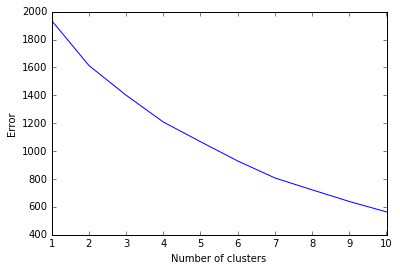

In [75]:
evaluate_clusters(dtm_lsa, 10)

Therefore we decide to use 10 clusters according to the previous error function

In [77]:
# K-means++
from sklearn.cluster import KMeans
k = 10
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=20, n_init=1)
kmeans_predict = kmeans.fit_predict(dtm_lsa)
print(kmeans_predict)

[8 9 4 ..., 0 0 4]


In [78]:
kmeans_result = [None]*10
for i in range(0, len(kmeans_predict)):
    if (kmeans_result[kmeans_predict[i]-1] is None):
        kmeans_result[kmeans_predict[i]-1] = []
    else:
        if (parsed_data[i]['categories'][0] in kmeans_result[kmeans_predict[i] - 1]):
            continue
        kmeans_result[kmeans_predict[i]-1].append(parsed_data[i]['categories'][0])

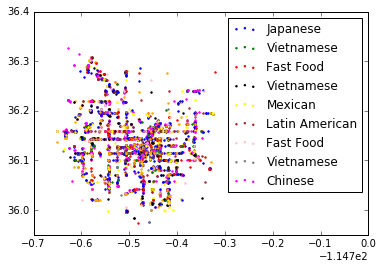

In [79]:
# K-Means scatter plot
colors = ['blue', 'green', 'red', 'black', 'yellow', 'brown', 'pink', 'grey', 'orange', 'magenta']
for i in range(0, len(parsed_data)):
    X = parsed_data[i]['longitude']
    Y = parsed_data[i]['latitude']
    if (kmeans.labels_[i] == 0):
        plta = plt.scatter(x = X, y = Y, color = colors[0], s = 2)
    elif (kmeans.labels_[i] == 1):
        pltb = plt.scatter(x = X, y = Y, color = colors[1], s = 2)
    elif (kmeans.labels_[i] == 2):
        pltc = plt.scatter(x = X, y = Y, color = colors[2], s = 2)
    elif (kmeans.labels_[i] == 3):
        pltd = plt.scatter(x = X, y = Y, color = colors[3], s = 2)
    elif (kmeans.labels_[i] == 4):
        plte = plt.scatter(x = X, y = Y, color = colors[4], s = 2)
    elif (kmeans.labels_[i] == 5):
        pltf = plt.scatter(x = X, y = Y, color = colors[5], s = 2)
    elif (kmeans.labels_[i] == 6):
        pltg = plt.scatter(x = X, y = Y, color = colors[6], s = 2)
    elif (kmeans.labels_[i] == 7):
        plth = plt.scatter(x = X, y = Y, color = colors[7], s = 2)
    elif (kmeans.labels_[i] == 8):
        plti = plt.scatter(x = X, y = Y, color = colors[8], s = 2)
    elif (kmeans.labels_[i] == 9):
        plti = plt.scatter(x = X, y = Y, color = colors[9], s = 2)
plt.scatter(x = -114.8, y = 36.35, s=0)
plt.legend((plta, pltb, pltc, pltd, plte, pltf, pltg, plth, plti, pltj), 
           (kmeans_result[0][0], 
            kmeans_result[1][0], 
            kmeans_result[2][0], 
            kmeans_result[3][0],
            kmeans_result[4][0],
            kmeans_result[5][0],
            kmeans_result[6][0],
            kmeans_result[7][0],
            kmeans_result[8][0],
            kmeans_result[9][0]))

In [47]:
# Hierarchical
import scipy.cluster.hierarchy as hac

z = hac.linkage(dtm_lsa, 'ward')
T = hac.fcluster(z, 10, 'maxclust')
print(T)

[6 7 5 ..., 7 7 4]


In [32]:
hierarchy_result = [None]*10
for i in range(0, len(T)):
    if (hierarchy_result[T[i]-1] is None):
        hierarchy_result[T[i]-1] = []
    else:
        if (parsed_data[i]['categories'][0] in hierarchy_result[T[i] - 1]):
            continue
        hierarchy_result[T[i]-1].append(parsed_data[i]['categories'][0])

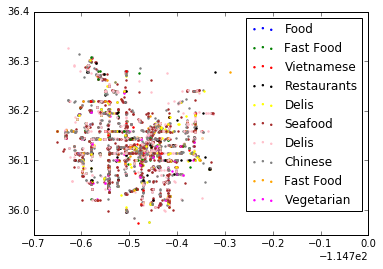

In [80]:
# Hierarchical scatter plot
T = hac.fcluster(z, 10, 'maxclust')
colors = ['blue', 'green', 'red', 'black', 'yellow', 'brown', 'pink', 'grey', 'orange', 'magenta']
for i in range(0, len(parsed_data)):
    X = parsed_data[i]['longitude']
    Y = parsed_data[i]['latitude']
    if (T[i] == 0):
        plta = plt.scatter(x = X, y = Y, color = colors[0], s = 2)
    elif (T[i] == 1):
        pltb = plt.scatter(x = X, y = Y, color = colors[1], s = 2)
    elif (T[i] == 2):
        pltc = plt.scatter(x = X, y = Y, color = colors[2], s = 2)
    elif (T[i] == 3):
        pltd = plt.scatter(x = X, y = Y, color = colors[3], s = 2)
    elif (T[i] == 4):
        plte = plt.scatter(x = X, y = Y, color = colors[4], s = 2)
    elif (T[i] == 5):
        pltf = plt.scatter(x = X, y = Y, color = colors[5], s = 2)
    elif (T[i] == 6):
        pltg = plt.scatter(x = X, y = Y, color = colors[6], s = 2)
    elif (T[i] == 7):
        plth = plt.scatter(x = X, y = Y, color = colors[7], s = 2)
    elif (T[i] == 8):
        plti = plt.scatter(x = X, y = Y, color = colors[8], s = 2)
    elif (T[i] == 9):
        pltj = plt.scatter(x = X, y = Y, color = colors[9], s = 2)
plt.scatter(x = -114.8, y = 36.35, s=0)
plt.legend((plta, pltb, pltc, pltd, plte, pltf, pltg, plth, plti, pltj), 
           (hierarchy_result[0][0], 
            hierarchy_result[1][0], 
            hierarchy_result[2][0], 
            hierarchy_result[3][0],
            hierarchy_result[4][0],
            hierarchy_result[5][0],
            hierarchy_result[6][0],
            hierarchy_result[7][0],
            hierarchy_result[8][0],
            hierarchy_result[9][0]))

In [49]:
# GMM
from sklearn import mixture
gmix = mixture.GMM(n_components=10)

In [50]:
gmix.fit(dtm_lsa)
print(gmix.means_)

[[ 0.98771931 -0.13555029]
 [ 0.61988085  0.78232836]
 [ 0.98709945 -0.14081438]
 [ 0.90114492  0.42651701]
 [ 0.98641062 -0.14628383]
 [ 0.7807897   0.62038382]
 [ 0.98917439  0.02068225]
 [ 0.48752338  0.87088073]
 [ 0.98879431 -0.12527692]]


In [51]:
GT = gmix.fit_predict(dtm_lsa)
gmm_result = [None]*9
for i in range(0, len(GT)):
    if (gmm_result[GT[i]-1] is None):
        gmm_result[GT[i]-1] = []
    else:
        if (parsed_data[i]['categories'][0] in gmm_result[GT[i] - 1]):
            continue
        gmm_result[GT[i]-1].append(parsed_data[i]['categories'][0])

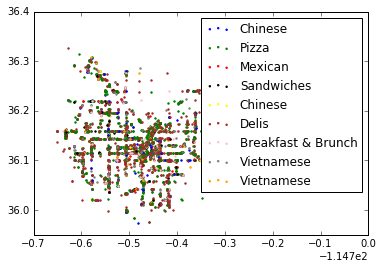

In [52]:
GMM_predict = gmix.fit_predict(dtm_lsa)
colors = ['blue', 'green', 'red', 'black', 'yellow', 'brown', 'pink', 'grey', 'orange', 'magenta']
for i in range(0, len(parsed_data)):
    X = parsed_data[i]['longitude']
    Y = parsed_data[i]['latitude']
    if (GMM_predict[i] == 0):
        plta = plt.scatter(x = X, y = Y, color = colors[0], s = 2)
    elif (GMM_predict[i] == 1):
        pltb = plt.scatter(x = X, y = Y, color = colors[1], s = 2)
    elif (GMM_predict[i] == 2):
        pltc = plt.scatter(x = X, y = Y, color = colors[2], s = 2)
    elif (GMM_predict[i] == 3):
        pltd = plt.scatter(x = X, y = Y, color = colors[3], s = 2)
    elif (GMM_predict[i] == 4):
        plte = plt.scatter(x = X, y = Y, color = colors[4], s = 2)
    elif (GMM_predict[i] == 5):
        pltf = plt.scatter(x = X, y = Y, color = colors[5], s = 2)
    elif (GMM_predict[i] == 6):
        pltg = plt.scatter(x = X, y = Y, color = colors[6], s = 2)
    elif (GMM_predict[i] == 7):
        plth = plt.scatter(x = X, y = Y, color = colors[7], s = 2)
    elif (GMM_predict[i] == 8):
        plti = plt.scatter(x = X, y = Y, color = colors[8], s = 2)
    elif (T[i] == 9):
        pltj = plt.scatter(x = X, y = Y, color = colors[9], s = 2)
plt.scatter(x = -114.8, y = 36.35, s=0)
plt.legend((plta, pltb, pltc, pltd, plte, pltf, pltg, plth, plti, pltj), 
           (gmm_result[0][0], 
            gmm_result[1][0], 
            gmm_result[2][0], 
            gmm_result[3][0],
            gmm_result[4][0],
            gmm_result[5][0],
            gmm_result[6][0],
            gmm_result[7][0],
            gmm_result[8][0],
            gmm_result[9][0]))

Compare your clusters with the results you obtained in Part 1. Use cluster comparison metrics, and also comment on which clustering appears (from your inspection of the clusters) to be more informative, and why. **(15 pts)**

In [97]:
# Kmeans Score
import sklearn.metrics as metrics
ss = metrics.silhouette_score(dtm_lsa, kmeans.labels_, metric='euclidean')
print('KMEANS Silhouette score is {}'.format(ss))

KMEANS Silhouette score is 0.362766370297028


In [91]:
# Hierarchical Score
ss = metrics.silhouette_score(dtm_lsa, T, metric='euclidean')
print('Hierarchical Silhouette score is {}'.format(ss))

Silhouette score is 0.026450822968470518


In [92]:
# GMM Score
ss = metrics.silhouette_score(dtm_lsa, GMM_predict, metric='euclidean')
print('GMM Silhouette score is {}'.format(ss))

GMM Silhouette score is 0.028304609472669752


The Silhouette socre of Kmeans, the metric is euclidean, Hierarchical, GMM in part1 are
Kmeans: 0.292766370297028
Hierarchical: 0.037450822968470518
GMM: 0.098304609472669752

The Silhouette socre of Kmeans, the metric is euclidean, Hierarchical, GMM for part2 are shown above

Compare the 6 results, we can see Kmeans clustering with 10 clusters and with 12 low rank approximation has the highest score: 0.362766370297028

Comparison and informative clustering
Look into three scatter plot in part2, we can see K-means++ scatter plot (exclude the noise part like deli) is more informative because it has a more clear culinary district distribution compared with Hierarchical and GMM by observing the color distribution of the scatters.
For Kmeans++ scatter plot above, we can see a clear culinary district, for example seafood and Chinese food area, which distributed clearly, in the plot.

For the result in part1, we can see the same thing happens. K-means++ in part1 shows a more clear culinary district distribution than GMM and Hierarchical (With color distribution, we can see a clear culinary district).

Therefore, no matter use or not use K rank approximation, K-means++ seems to be the most informative clustering for this question. Probably because one resturant may have many categories, for example, a Chinese restaurant can have Japanese and Chinese food features. Then if there are two restaurants which are very close in location, GMM or hierarchical may clusters them into two clusters, which seems less informative because the location scatter plot might looks messed. Furthermore, GMM is kind of soft clustering (probability calculation...), which makes it's hard to tell the culinary district in solving this problem (the reason is shown in the previous example).  For K-means++, as a hard clustering, could do a better job for telling different culinary district in this problem.

----------